In [446]:
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
import numpy as np  #для матричных вычислений
import joblib
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import parallel_backend
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [404]:
# читаем данные
cvd = pd.read_csv("/content/data/train.csv")

In [405]:
# Просмотр первых строк
cvd.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [406]:
# ОПРЕДЕЛИМ размер датасета:
print(cvd.shape)

(600000, 15)


In [407]:
# Выведем информацию о пропусках:
display(cvd.isnull().sum())

,0
ID,0
age,0
sex,0
chest,0
resting_blood_pressure,0
serum_cholestoral,0
fasting_blood_sugar,0
resting_electrocardiographic_results,0
maximum_heart_rate_achieved,0
exercise_induced_angina,0


In [408]:
# Информация о данных
print(cvd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

В нашем датасете 600000 строк, 15 столбцов.
Пропусков нет.

In [409]:
# Проверяем данные на наличие дубликатов строк
num_duplicates = cvd.duplicated().sum()
print(f"Количество дубликатных строк: {num_duplicates}")

Количество дубликатных строк: 0


In [410]:
data = cvd.copy()

In [411]:
data['number_of_major_vessels']=data['number_of_major_vessels'].astype(object)
data['slope']=data['slope'].astype(object)
data['exercise_induced_angina']=data['exercise_induced_angina'].astype(object)
data['resting_electrocardiographic_results']=data['resting_electrocardiographic_results'].astype(object)
data['fasting_blood_sugar']=data['fasting_blood_sugar'].astype(object)
data['age']=data['age'].astype(object)
data['thal']=data['thal'].astype(object)

In [412]:
data['age']=data['age'].astype(int)
data['sex']=data['sex'].astype(object)

In [413]:
data['class']=data['class'].round()

In [414]:
data['class'].value_counts()

,count
class,
0,333489
1,266511


In [415]:
data.head(4)

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1


In [416]:
print(data.describe())

                  ID            age          chest  resting_blood_pressure  \
count  600000.000000  600000.000000  600000.000000           600000.000000   
mean   299999.500000      53.926715       3.170247              131.340485   
std    173205.225094       9.091247       0.949618               17.842450   
min         0.000000      26.000000      -0.538498               82.918527   
25%    149999.750000      48.000000       3.000000              119.924094   
50%    299999.500000      55.000000       3.000000              129.727941   
75%    449999.250000      60.000000       4.000000              139.915216   
max    599999.000000      79.000000       4.000000              209.673650   

       serum_cholestoral  maximum_heart_rate_achieved        oldpeak  \
count      600000.000000                600000.000000  600000.000000   
mean          249.592420                   149.592069       1.051391   
std            51.699976                    23.072593       1.144288   
min      

 Возраст (age) - Возраст распределён в диапазоне от 26 до 79 лет с нормальным разбросом вокруг среднего. Выбросов и аномалий по возрасту нет.
 Chest (боль в груди) - Значения в основном около 3-4, но отрицательное минимальное значение (-0.54) подозрительно и, скорее всего, является ошибкой или выбросом. Нужно проверить природу признака и очистить данные.
  Resting Blood Pressure (артериальное давление в покое) - Большинство значений в пределах нормального и слегка повышенного давления, но максимальное значение очень высокое — стоит проверить его корректность.
  Serum Cholestoral (общий холестерин) - Холестерин в среднем повышен, что типично для пациентов с сердечными заболеваниями. Максимальное значение сильно выделяется и требует проверки.
  Maximum Heart Rate Achieved (максимальная достигнутая частота сердечных сокращений) - Значения в пределах физиологических норм, разброс ожидаемый.
  Oldpeak (ST depression депрессия сегмента ST) - Большинство значений около 0-1.7, отрицательные значения могут быть технически допустимы, но требуют проверки. Высокие значения могут указывать на выраженную ишемию.
  Class (целевой признак: наличие заболевания) -                         Среднее: 0.444 — около 44.4% объектов имеют класс 1 (болен).
Стандартное отклонение: 0.497 — близко к биномиальному распределению.
Минимум: 0, максимум: 1.
Медиана: 0, 75-й перцентиль: 1 — распределение классов смещено, есть баланс, но чуть больше отрицательных.

Целевая переменная сбалансирована достаточно хорошо для обучения моделей.


In [417]:
# Выведем все уникальные значения и их количество по столбцу  chest (тип боли в груди):
print(data['chest'].value_counts(dropna=False))

chest
4.000000    285344
3.000000    176173
1.782514         4
1.730036         4
1.945328         4
             ...  
1.276876         1
1.493459         1
1.489957         1
1.501289         1
1.797030         1
Name: count, Length: 133009, dtype: int64


В столбце chest (тип боли в груди) есть:

Очень много записей с четкими целочисленными значениями 4 и 3 (более 460 тысяч вместе).
Очень много уникальных дробных значений с небольшой частотой (большое количество уникальных значений — 133009), например 1.782514, 1.730036 и т.д.
Это выглядит необычно для признака, который, должен быть категориальным ( с небольшим числом категорий 1, 2, 3, 4).

In [418]:
# округлим до целых чисел данные в столбце "chest"
data['chest_rounded'] = data['chest'].round().astype(int)
print(data['chest_rounded'].value_counts())

chest_rounded
 4    285350
 3    181797
 2     83989
 1     47956
 0       907
-1         1
Name: count, dtype: int64


При условии, что сила боли измеряется по шкалее от 1 до 4 можем предположить, что значения 0 и -1 невалидны и их нужно обработать

In [419]:
# Заменим аномальные значения на NaN
data['chest_clean'] = data['chest_rounded'].replace({0: np.nan, -1: np.nan})

most_freq = data['chest_clean'].mode()[0]

data['chest_clean'] = data['chest_clean'].fillna(most_freq)

data['chest_clean'] = data['chest_clean'].astype('category')
print(data['chest_clean'].value_counts())

chest_clean
4.0    286258
3.0    181797
2.0     83989
1.0     47956
Name: count, dtype: int64


In [420]:
df = data.copy()

In [421]:
# удалим дублирующие столбцы
df = df.drop(columns=['chest', 'chest_rounded'])

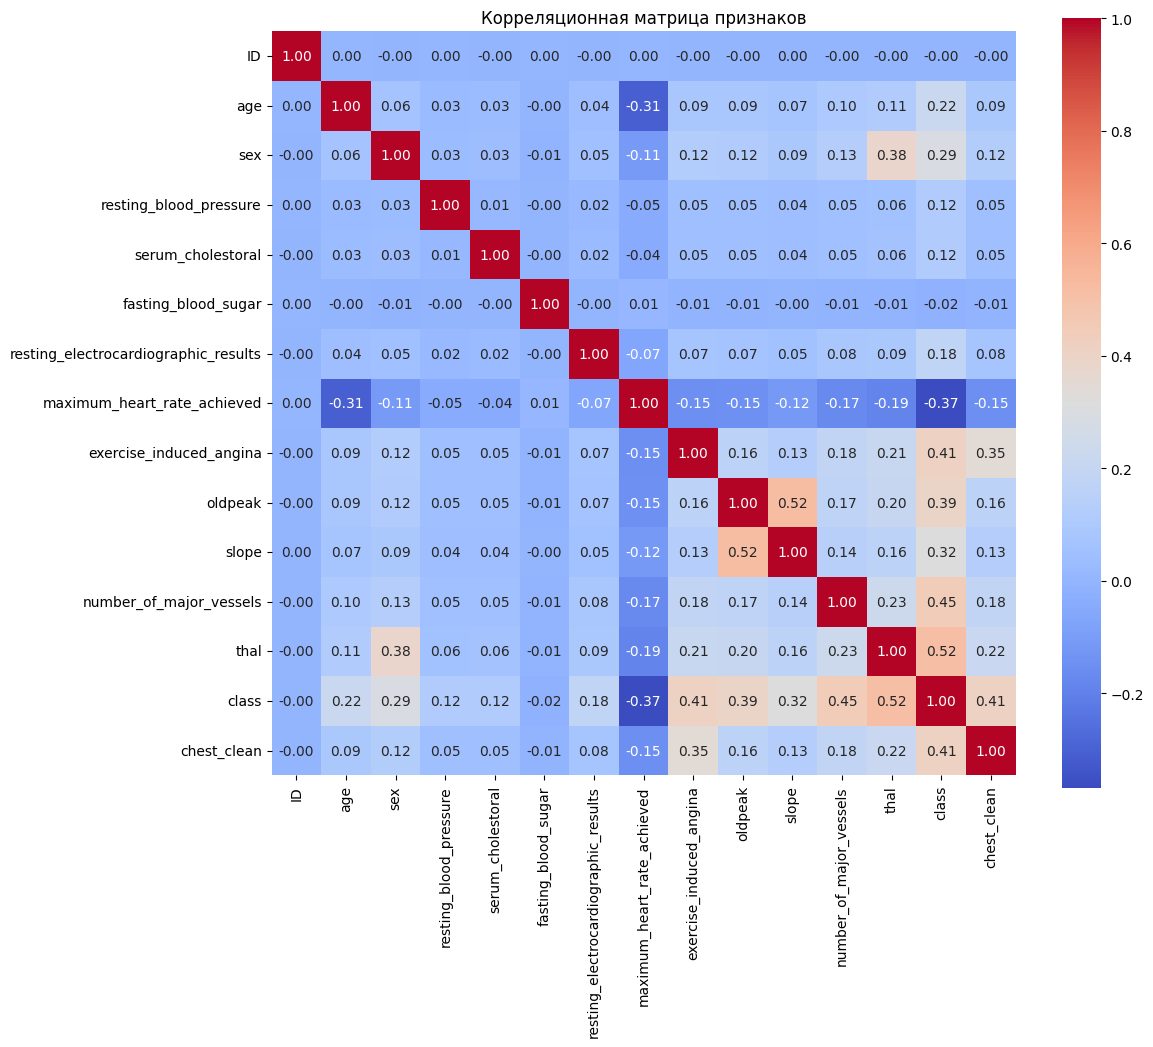

In [422]:
#  Построим корреляционную матрицу
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица признаков')
plt.show()


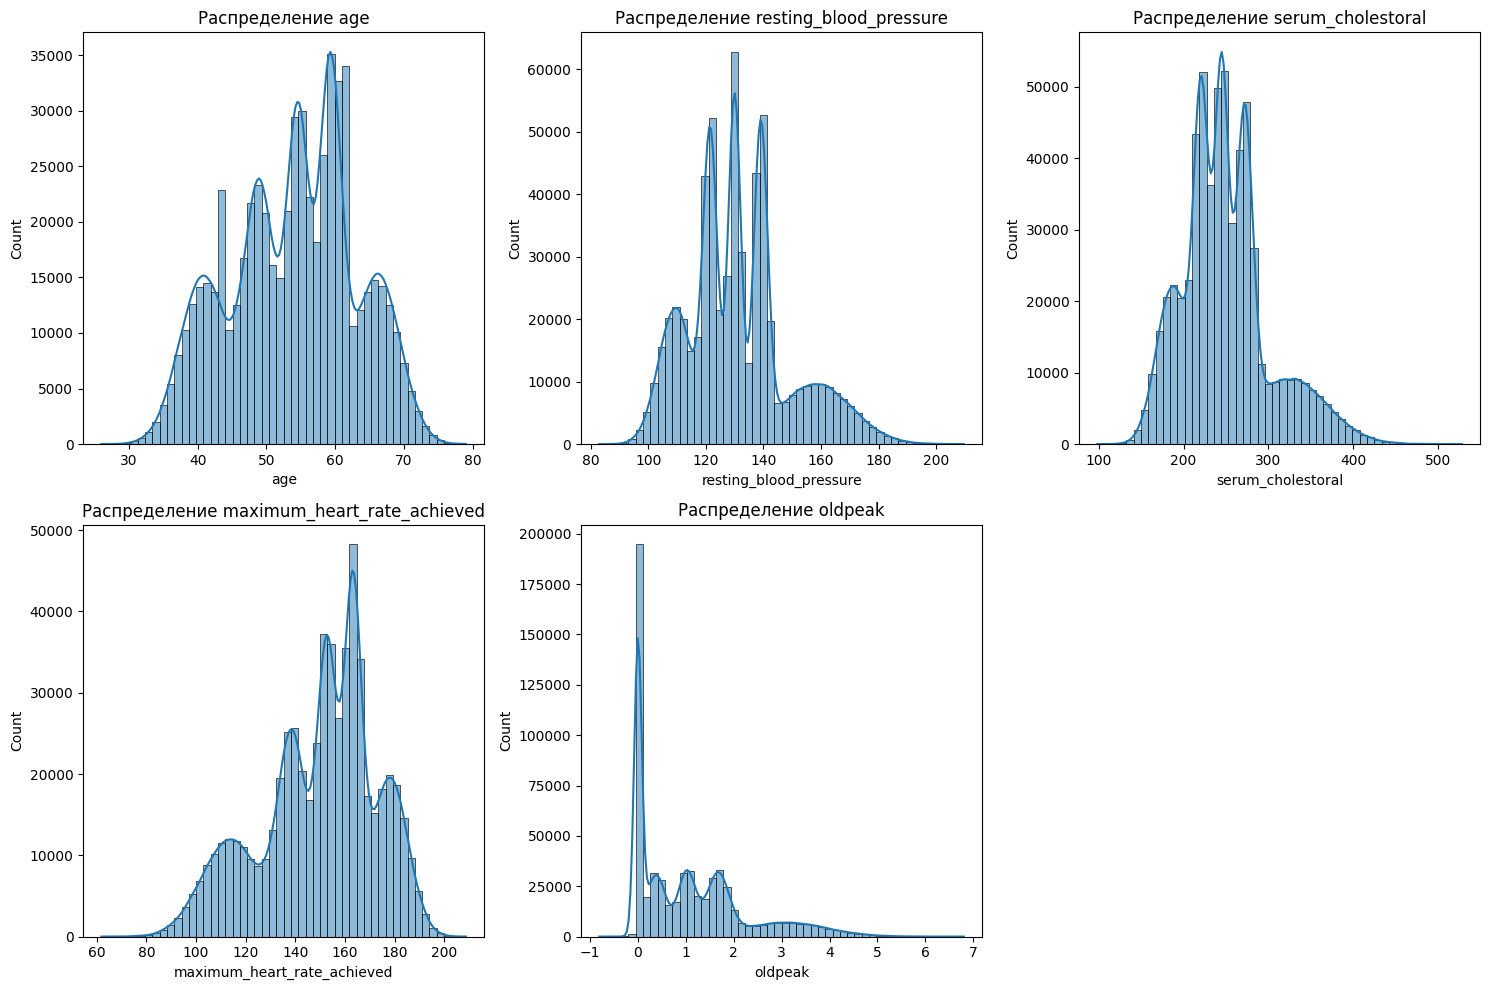

In [423]:
#  Посмотрим распределение ключевых числовых признаков
num_cols = ['age', 'resting_blood_pressure', 'serum_cholestoral',
            'maximum_heart_rate_achieved', 'oldpeak']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

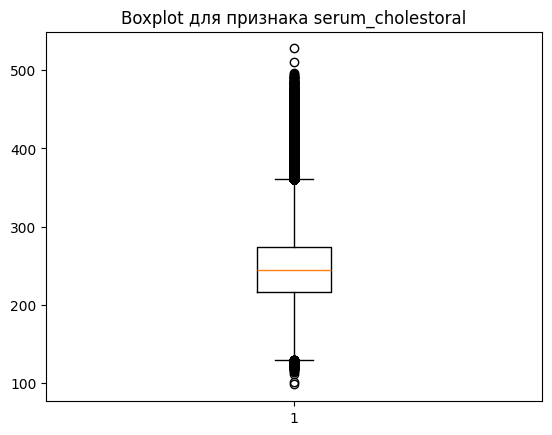

In [424]:
# Посмотрим выбросы по столбцу'serum_cholestoral'
plt.boxplot(df['serum_cholestoral'])
plt.title('Boxplot для признака serum_cholestoral')
plt.show()

По полученным данным можно сделать вывод:

признак содержит много выбросов с высокими значениями холестерина (выше ~360), что может быть связано с редкими, но серьезными случаями гиперхолестеринемии или ошибками измерения/ввода данных.

Нижние выбросы менее выражены, но тоже есть (ниже ~100).

In [425]:
# посмотрим эти выбросы более прицельно
# Вычисляем границы выбросов по правилу 1.5*IQR
Q1 = df['serum_cholestoral'].quantile(0.25)
Q3 = df['serum_cholestoral'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Подсчёт выбросов
outliers_high = df[df['serum_cholestoral'] > upper_bound]
outliers_low = df[df['serum_cholestoral'] < lower_bound]

print(f"Количество выбросов сверху: {len(outliers_high)}")
print(f"Количество выбросов снизу: {len(outliers_low)}")

Количество выбросов сверху: 24230
Количество выбросов снизу: 112


Это достаточно много

In [426]:
# 3. Визуальная проверка (опционально)
# import matplotlib.pyplot as plt
# df['serum_cholestoral'].plot.box()
# plt.show()

# 4. Обработка выбросов методом винзоризации
def winsorize_series(s, lower, upper):
    return s.clip(lower=lower, upper=upper)

df['serum_cholestoral_winsorized'] = winsorize_series(df['serum_cholestoral'], lower_bound, upper_bound)

# 5. Проверка после обработки
print(df[['serum_cholestoral', 'serum_cholestoral_winsorized']].describe())

# Теперь можно использовать столбец 'serum_cholestoral_winsorized' для обучения моделей

       serum_cholestoral  serum_cholestoral_winsorized
count      600000.000000                 600000.000000
mean          249.592420                    248.583954
std            51.699976                     49.024498
min            98.326263                    129.671731
25%           216.475964                    216.475964
50%           244.233699                    244.233699
75%           274.345453                    274.345453
max           527.755764                    361.149686


In [427]:
# удалим исходный столбец 'serum_cholestoral'
df.drop(columns=['serum_cholestoral'], inplace=True)

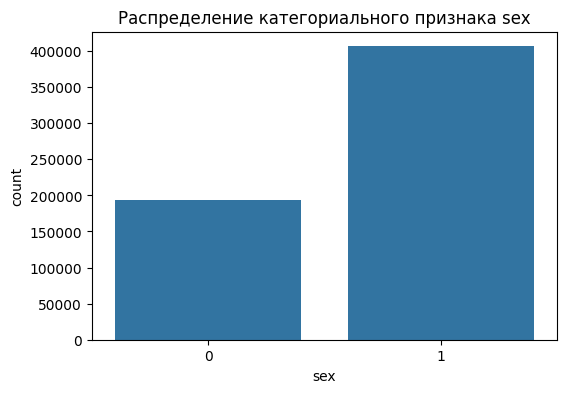

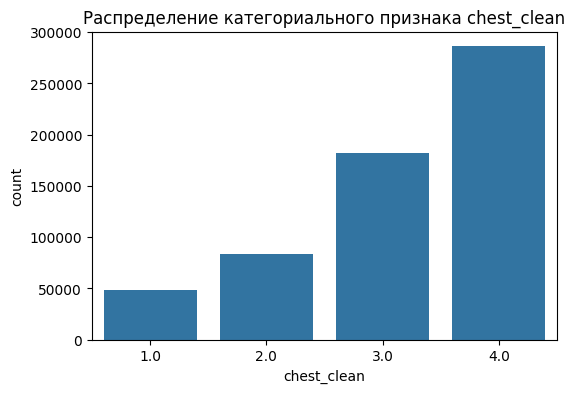

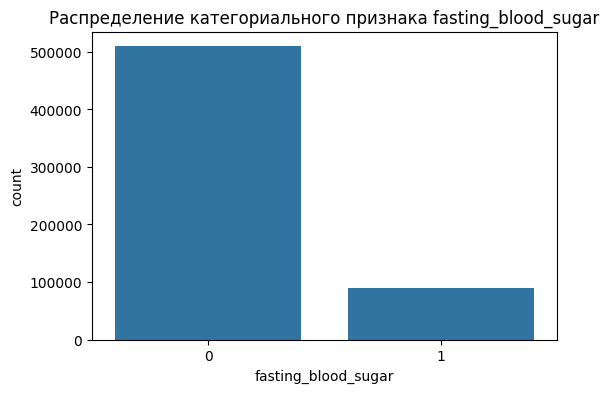

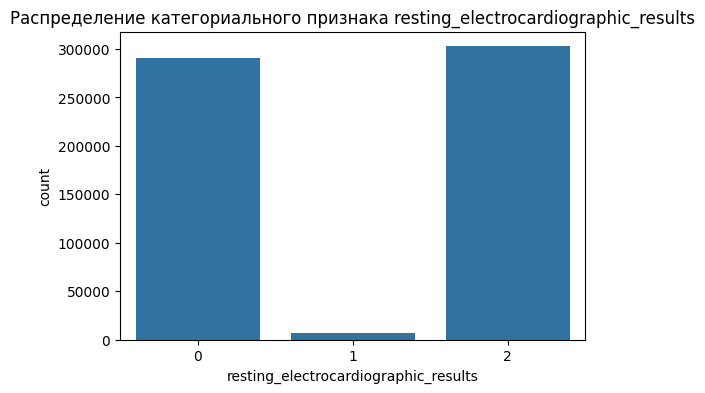

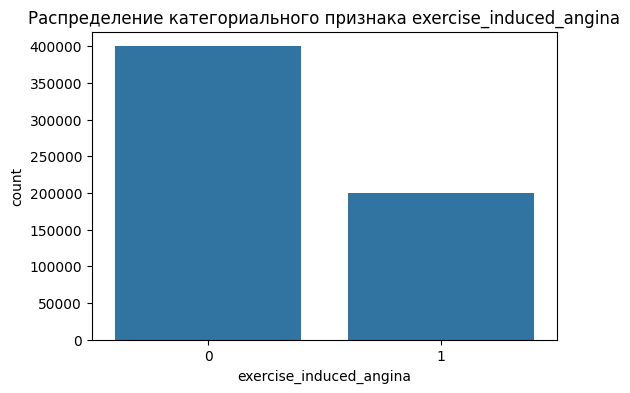

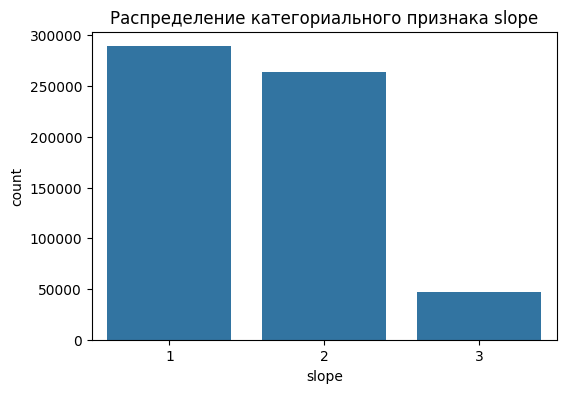

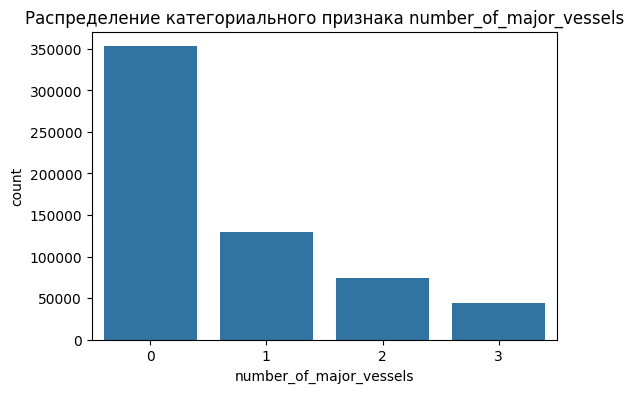

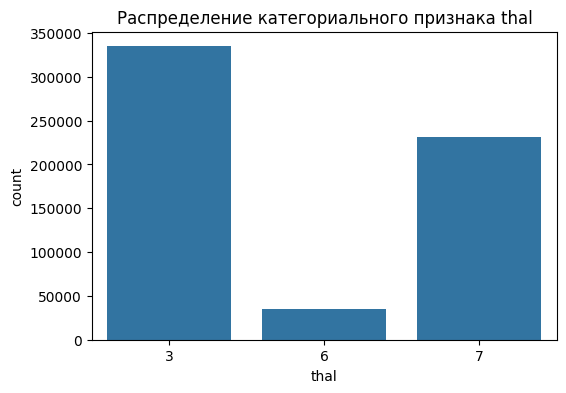

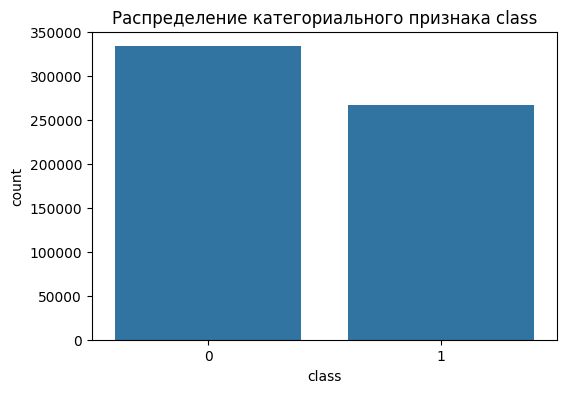

In [428]:
# Распределение категориальных признаков
cat_cols = ['sex', 'chest_clean', 'fasting_blood_sugar', 'resting_electrocardiographic_results',
            'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal', 'class']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Распределение категориального признака {col}')
    plt.show()

In [429]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   ID                                    600000 non-null  int64   
 1   age                                   600000 non-null  int64   
 2   sex                                   600000 non-null  object  
 3   resting_blood_pressure                600000 non-null  float64 
 4   fasting_blood_sugar                   600000 non-null  object  
 5   resting_electrocardiographic_results  600000 non-null  object  
 6   maximum_heart_rate_achieved           600000 non-null  float64 
 7   exercise_induced_angina               600000 non-null  object  
 8   oldpeak                               600000 non-null  float64 
 9   slope                                 600000 non-null  object  
 10  number_of_major_vessels               600000 non-null  o

Обучим модель логистической регрессии

In [326]:
# Разделим признаки и целевую переменную
X = df.drop(columns=['class'])
y = df['class']

# Определим числовые и категориальные признаки
num_features = ['age', 'resting_blood_pressure', 'maximum_heart_rate_achieved', 'oldpeak', 'serum_cholestoral_winsorized']
cat_features = ['sex', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal', 'chest_clean']

# Разделим на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Создадим трансформер для числовых и категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# Создадим pipeline с препроцессингом и моделью
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000, solver='lbfgs'))
])

# Обучение
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Оценка
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8892733333333334

Confusion Matrix:
 [[75741  7631]
 [ 8978 57650]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     83372
           1       0.88      0.87      0.87     66628

    accuracy                           0.89    150000
   macro avg       0.89      0.89      0.89    150000
weighted avg       0.89      0.89      0.89    150000



In [327]:
# Создание и обучение модели случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания на обучающей выборке
y_pred = rf_model.predict(X_test)

#  Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8977333333333334

Confusion Matrix:
 [[76309  7063]
 [ 8277 58351]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     83372
           1       0.89      0.88      0.88     66628

    accuracy                           0.90    150000
   macro avg       0.90      0.90      0.90    150000
weighted avg       0.90      0.90      0.90    150000



Обучим Neural Network

In [328]:
#  Преобразуем категориальные признаки в фиктивные переменные
cat_cols = ['number_of_major_vessels', 'slope', 'exercise_induced_angina',
            'resting_electrocardiographic_results', 'fasting_blood_sugar', 'age', 'thal']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Разделим данные на признаки и целевую переменную
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Масштабируем признаки =
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создаём и обучаем модель нейросети
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Предсказываем и оцениваем качество
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8982833333333333

Confusion Matrix:
 [[60558  6254]
 [ 5952 47236]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     66812
           1       0.88      0.89      0.89     53188

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000





Создадим pipeline для наших моделей

In [432]:
# Разделим признаки и целевую переменную
X = df.drop(columns=['class'])
y = df['class']

# Определим числовые и категориальные признаки
num_features = ['age', 'resting_blood_pressure', 'maximum_heart_rate_achieved', 'oldpeak', 'serum_cholestoral_winsorized']
cat_features = ['sex', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal', 'chest_clean']

# Разделим на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [433]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

for name, clf in models.items():
    print(f"--- {name} ---")
    # Создаём pipeline с препроцессингом и моделью
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    # Обучаем
    model.fit(X_train, y_train)
    # Предсказываем
    y_pred = model.predict(X_test)
    # Оцениваем
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.8893
Confusion Matrix:
[[75741  7631]
 [ 8978 57650]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     83372
           1       0.88      0.87      0.87     66628

    accuracy                           0.89    150000
   macro avg       0.89      0.89      0.89    150000
weighted avg       0.89      0.89      0.89    150000



--- Random Forest ---
Accuracy: 0.8965
Confusion Matrix:
[[76201  7171]
 [ 8352 58276]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     83372
           1       0.89      0.87      0.88     66628

    accuracy                           0.90    150000
   macro avg       0.90      0.89      0.90    150000
weighted avg       0.90      0.90      0.90    150000



--- Neural Network ---
Accuracy: 0.9008
Confusion Matrix:
[[76526  6846]
 [ 8041 58587]]
Classification Report:
  

Все три модели показывают высокое качество, Neural Network и Random Forest немного превосходят Logistic Regression.
Если нужна максимальная точность и вы готовы пожертвовать объяснимостью и временем обучения — выбирайте Neural Network.
Если важна интерпретируемость и скорость — Logistic Regression.
Random Forest — компромисс между точностью и объяснимостью, часто лучший выбор для практических задач.


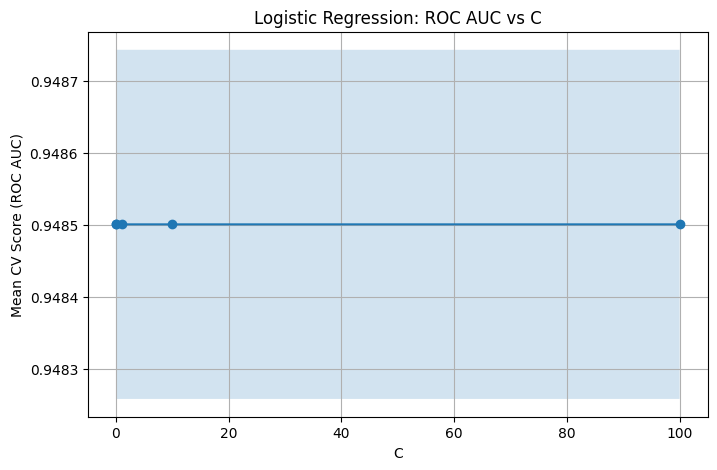

In [398]:
X = df.drop(columns=['class'])
y = df['class']

# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Настройка и обучение модели с подбором гиперпараметров
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(max_iter=1000, solver='liblinear')

grid_lr = GridSearchCV(lr, param_grid, scoring='roc_auc', cv=5)
grid_lr.fit(X_train_scaled, y_train)

# Функция для построения графика
def plot_grid_search(cv_results, param_name, title='Grid Search'):
    params = cv_results['param_' + param_name].data
    mean_test_scores = cv_results['mean_test_score']
    std_test_scores = cv_results['std_test_score']

    plt.figure(figsize=(8, 5))
    plt.plot(params, mean_test_scores, marker='o')
    plt.fill_between(params,
                     mean_test_scores - std_test_scores,
                     mean_test_scores + std_test_scores,
                     alpha=0.2)
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel('Mean CV Score (ROC AUC)')
    plt.grid(True)
    plt.show()

# Построение графика
plot_grid_search(grid_lr.cv_results_, 'C', title='Logistic Regression: ROC AUC vs C')

In [402]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(max_iter=1000, solver='liblinear')

grid_lr = GridSearchCV(lr, param_grid, scoring='roc_auc', cv=5)
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

In [351]:
# читаем  тестовые данные  данные
test = pd.read_csv("/content/data/test.csv")

In [352]:
# Информация о данных
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    400000 non-null  int64  
 1   age                                   400000 non-null  float64
 2   sex                                   400000 non-null  int64  
 3   chest                                 400000 non-null  float64
 4   resting_blood_pressure                400000 non-null  float64
 5   serum_cholestoral                     400000 non-null  float64
 6   fasting_blood_sugar                   400000 non-null  int64  
 7   resting_electrocardiographic_results  400000 non-null  int64  
 8   maximum_heart_rate_achieved           400000 non-null  float64
 9   exercise_induced_angina               400000 non-null  int64  
 10  oldpeak                               400000 non-null  float64
 11  

In [354]:
test['number_of_major_vessels']=test['number_of_major_vessels'].astype(object)
test['slope']=test['slope'].astype(object)
test['exercise_induced_angina']=test['exercise_induced_angina'].astype(object)
test['resting_electrocardiographic_results']=test['resting_electrocardiographic_results'].astype(object)
test['fasting_blood_sugar']=test['fasting_blood_sugar'].astype(object)
test['age']=test['age'].astype(object)
test['thal']=test['thal'].astype(object)

In [355]:
test['age']=test['age'].astype(int)
test['sex']=test['sex'].astype(object)

In [356]:
print(test.columns.tolist())

['ID', 'age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak', 'slope', 'number_of_major_vessels', 'thal']


In [357]:
test.head(4)

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7


In [358]:
# округлим до целых чисел данные в столбце "chest"
test['chest'] = test['chest'].round().astype(int)
print(test['chest'].value_counts())

chest
4    190326
3    120526
2     56553
1     32016
0       579
Name: count, dtype: int64


In [359]:
# Заменим аномальные значения на NaN
test['chest_clean'] = test['chest'].replace({0: np.nan, -1: np.nan})

most_freq = test['chest_clean'].mode()[0]

test['chest_clean'] = test['chest_clean'].fillna(most_freq)

test['chest_clean'] = test['chest_clean'].astype('category')
print(test['chest_clean'].value_counts())

chest_clean
4.0    190905
3.0    120526
2.0     56553
1.0     32016
Name: count, dtype: int64


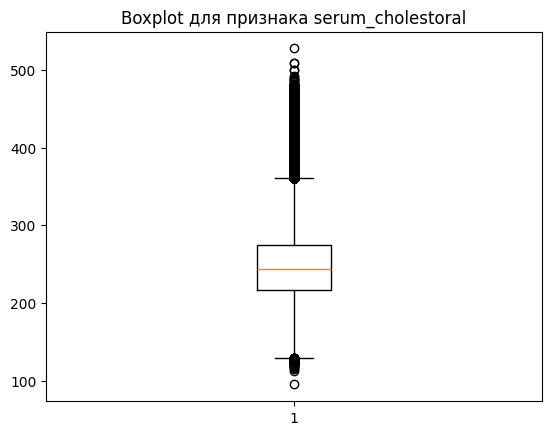

In [360]:
# Посмотрим выбросы по столбцу'serum_cholestoral'
plt.boxplot(test['serum_cholestoral'])
plt.title('Boxplot для признака serum_cholestoral')
plt.show()

In [361]:
# посмотрим эти выбросы более прицельно
# Вычисляем границы выбросов по правилу 1.5*IQR
Q1 = test['serum_cholestoral'].quantile(0.25)
Q3 = test['serum_cholestoral'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Подсчёт выбросов
outliers_high = test[test['serum_cholestoral'] > upper_bound]
outliers_low = test[test['serum_cholestoral'] < lower_bound]

print(f"Количество выбросов сверху: {len(outliers_high)}")
print(f"Количество выбросов снизу: {len(outliers_low)}")

Количество выбросов сверху: 16074
Количество выбросов снизу: 70


In [362]:
# 3. Визуальная проверка (опционально)
# import matplotlib.pyplot as plt
# test['serum_cholestoral'].plot.box()
# plt.show()

# 4. Обработка выбросов методом винзоризации
def winsorize_series(s, lower, upper):
    return s.clip(lower=lower, upper=upper)

test['serum_cholestoral_winsorized'] = winsorize_series(test['serum_cholestoral'], lower_bound, upper_bound)

# 5. Проверка после обработки
print(test[['serum_cholestoral', 'serum_cholestoral_winsorized']].describe())

# Теперь можно использовать столбец 'serum_cholestoral_winsorized' для обучения моделей

       serum_cholestoral  serum_cholestoral_winsorized
count      400000.000000                 400000.000000
mean          249.593475                    248.585270
std            51.720531                     49.041754
min            94.958220                    129.601635
25%           216.455450                    216.455450
50%           244.273212                    244.273212
75%           274.357993                    274.357993
max           527.712687                    361.211808


In [342]:
# удалим исходный столбец 'serum_cholestoral'
test.drop(columns=['serum_cholestoral'], inplace=True)

In [343]:
print(test.columns.tolist())

['ID', 'age', 'sex', 'chest', 'resting_blood_pressure', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak', 'slope', 'number_of_major_vessels', 'thal', 'chest_clean', 'serum_cholestoral_winsorized']


In [344]:
test=test.drop(['chest'],axis=1)

In [345]:
# Информация о данных
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   ID                                    400000 non-null  int64   
 1   age                                   400000 non-null  int64   
 2   sex                                   400000 non-null  object  
 3   resting_blood_pressure                400000 non-null  float64 
 4   fasting_blood_sugar                   400000 non-null  object  
 5   resting_electrocardiographic_results  400000 non-null  object  
 6   maximum_heart_rate_achieved           400000 non-null  float64 
 7   exercise_induced_angina               400000 non-null  object  
 8   oldpeak                               400000 non-null  float64 
 9   slope                                 400000 non-null  object  
 10  number_of_major_vessels               400000 non-null  o

In [346]:
# Список признаков, которые вы использовали при обучении (пример)
features = ['age', 'sex', 'resting_blood_pressure', 'fasting_blood_sugar',
            'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
            'exercise_induced_angina', 'oldpeak', 'slope', 'number_of_major_vessels',
            'thal', 'chest_clean', 'serum_cholestoral_winsorized']

# Берём признаки из тестового DataFrame
X_test = test[features]

# Делаем предсказания класса
y_pred = model.predict(X_test)

# Если нужны вероятности классов (например, для ROC AUC)
y_proba = model.predict_proba(X_test)[:, 1]  # вероятность положительного класса

# Например, можно добавить предсказания в DataFrame test
test['predicted_class'] = y_pred
test['predicted_proba'] = y_proba

# Посмотрим результат
print(test[['ID', 'predicted_class', 'predicted_proba']].head())


       ID  predicted_class  predicted_proba
0  600000                1         0.988705
1  600001                1         0.976128
2  600002                0         0.003026
3  600003                0         0.152425
4  600004                0         0.027641


In [366]:
# Получаем вероятности заболевания (класс 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Получаем предсказанные классы с порогом 0.5
y_pred = (y_proba >= 0.5).astype(int)

# Оценка заболеваемости — доля пациентов с заболеванием по предсказаниям
disease_rate = y_pred.mean()
print(f"Оценка заболеваемости (по предсказаниям): {disease_rate:.2%}")

# Средняя вероятность заболевания по модели
mean_prob_disease = y_proba.mean()
print(f"Средняя вероятность заболевания: {mean_prob_disease:.2%}")

Оценка заболеваемости (по предсказаниям): 43.71%
Средняя вероятность заболевания: 44.46%


Скрипт inference.py

In [127]:
results = pd.DataFrame({
    'predicted_class': pipeline.predict(X_test),
    'probability_class_1': pipeline.predict_proba(X_test)[:, 1]
})

print(results.head())

   predicted_class  probability_class_1
0                1                 0.98
1                1                 0.96
2                0                 0.02
3                0                 0.22
4                0                 0.02


In [128]:
results.to_csv('predictions.csv', index=False)

In [126]:
print(y_pred)

[1 1 0 ... 0 0 1]


In [122]:
y_proba = pipeline.predict_proba(X_test)
print(y_proba)  # массив с вероятностями для каждого класса

[[0.02 0.98]
 [0.04 0.96]
 [0.98 0.02]
 ...
 [0.98 0.02]
 [0.9  0.1 ]
 [0.   1.  ]]


In [123]:
y_proba = pipeline.predict_proba(X_test)[:, 1]  # вероятности класса 1
print(y_proba)

[0.98 0.96 0.02 ... 0.02 0.1  1.  ]


In [448]:
pip install joblib

In [451]:
def load_model(model_path='path/to/model.pkl', scaler_path='path/to/scaler.pkl'):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    return model, scaler

def preprocess(data, scaler):
    # Предполагается, что data — DataFrame с признаками
    return scaler.transform(data)

def predict(model, X):
    # Получаем вероятности положительного класса
    probas = model.predict_proba(X)[:, 1]
    # Бинарные метки по порогу 0.5
    preds = (probas >= 0.5).astype(int)
    return preds, probas

def main():
    # Загрузка новых данных
    new_data = pd.read_csv('/content/predictions.csv')

    # Загрузка модели и скейлера
    model, scaler = load_model()

    # Предобработка
    X_processed = preprocess(new_data, scaler)

    # Предсказания
    preds, probas = predict(model, X_processed)

    # Вывод результатов
    results = new_data.copy()
    results['prediction'] = preds
    results['probability'] = probas

    print(results)

    # Сохранение результатов в CSV
    results.to_csv('predictions.csv', index=False)

if __name__ == '__main__':
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/model.pkl'

In [456]:
!python inference.py

python3: can't open file '/content/inference.py': [Errno 2] No such file or directory


In [453]:
# После обучения
joblib.dump(grid_lr.best_estimator_, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']